<a href="https://colab.research.google.com/github/davidmartine/ProyectoEnergiaColPy/blob/RamaJuanD/EnergiaCol.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [81]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from google.colab import drive
from scipy.interpolate import make_interp_spline
from sklearn.linear_model import LinearRegression

dataFrame = pd.read_csv('/content/drive/MyDrive/ProyectoAnalisisDatos/Datos/Datagit/generacioncapacidadelectrica.csv', sep=',',encoding='ISO-8859-1')

dataFrame

,IdGeneracionCap,NombreFuente,NombrePais,NombreAnio,NombreUnidad,ValorProduccion
0,1,térmica renovable,colombia,2021,gwh,7.971453e+07
1,2,térmica renovable,colombia,2020,gwh,7.257880e+09
2,3,térmica renovable,colombia,2019,gwh,6.961333e+09
3,4,térmica renovable,colombia,2018,gwh,7.300789e+09
4,5,térmica renovable,colombia,2017,gwh,6.324473e+09
...,...,...,...,...,...,...
171,172,hidro,colombia,2004,gwh,3.984867e+09
172,173,hidro,colombia,2003,gwh,3.719665e+09
173,174,hidro,colombia,2002,gwh,3.467024e+09
174,175,hidro,colombia,2001,gwh,3.243892e+09


In [11]:
dataFrame.dtypes

,0
IdGeneracionCap,int64
NombreFuente,object
NombrePais,object
NombreAnio,int64
NombreUnidad,object
ValorProduccion,float64


In [12]:
dataFrame.describe()

,IdGeneracionCap,NombreAnio,ValorProduccion
count,176.000000,176.000000,1.760000e+02
mean,88.500000,2010.500000,2.002610e+09
std,50.950957,6.362389,2.810307e+09
min,1.000000,2000.000000,0.000000e+00
25%,44.750000,2005.000000,0.000000e+00
50%,88.500000,2010.500000,8.166255e+06
75%,132.250000,2016.000000,4.105220e+09
max,176.000000,2021.000000,9.962021e+09


In [ ]:
dataFrame.head(5) # mostrar los primeros 5 valores

,IdGeneracionCap,NombreFuente,NombrePais,NombreAnio,NombreUnidad,ValorProduccion
0,1,térmica renovable,colombia,2021,gwh,7.971453e+07
1,2,térmica renovable,colombia,2020,gwh,7.257880e+09
2,3,térmica renovable,colombia,2019,gwh,6.961333e+09
3,4,térmica renovable,colombia,2018,gwh,7.300789e+09
4,5,térmica renovable,colombia,2017,gwh,6.324473e+09


In [ ]:
dataFrame.tail()# mostrar los ultimos valores

,IdGeneracionCap,NombreFuente,NombrePais,NombreAnio,NombreUnidad,ValorProduccion
171,172,hidro,colombia,2004,gwh,3.984867e+09
172,173,hidro,colombia,2003,gwh,3.719665e+09
173,174,hidro,colombia,2002,gwh,3.467024e+09
174,175,hidro,colombia,2001,gwh,3.243892e+09
175,176,hidro,colombia,2000,gwh,3.107428e+09


In [ ]:
dataFrame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 176 entries, 0 to 175
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   IdGeneracionCap  176 non-null    int64  
 1   NombreFuente     176 non-null    object 
 2   NombrePais       176 non-null    object 
 3   NombreAnio       176 non-null    int64  
 4   NombreUnidad     176 non-null    object 
 5   ValorProduccion  176 non-null    float64
dtypes: float64(1), int64(2), object(3)
memory usage: 8.4+ KB


In [ ]:
dataFrame.isnull().sum()

,0
IdGeneracionCap,0
NombreFuente,0
NombrePais,0
NombreAnio,0
NombreUnidad,0
ValorProduccion,0


In [14]:

dataFrameLD = dataFrame.rename(columns={'NombreFuente':'Nombre Fuente','NombrePais': 'Pais','NombreAnio': 'Año',
                                        'NombreUnidad':'Unidad','ValorProduccion':'Produccion'}).drop(columns=['IdGeneracionCap'])
dataFrameLD[['Nombre Fuente', 'Año', 'Produccion']]
dataFrameLD[dataFrameLD['Produccion'] > 0.0]

,Nombre Fuente,Pais,Año,Unidad,Produccion
0,térmica renovable,colombia,2021,gwh,7.971453e+07
1,térmica renovable,colombia,2020,gwh,7.257880e+09
2,térmica renovable,colombia,2019,gwh,6.961333e+09
3,térmica renovable,colombia,2018,gwh,7.300789e+09
4,térmica renovable,colombia,2017,gwh,6.324473e+09
...,...,...,...,...,...
171,hidro,colombia,2004,gwh,3.984867e+09
172,hidro,colombia,2003,gwh,3.719665e+09
173,hidro,colombia,2002,gwh,3.467024e+09
174,hidro,colombia,2001,gwh,3.243892e+09


In [ ]:
display(dataFrameLD)

,IdGeneracionCap,NombreFuente,NombrePais,NombreAnio,NombreUnidad,ValorProduccion
0,1,térmica renovable,colombia,2021,gwh,7.971453e+07
1,2,térmica renovable,colombia,2020,gwh,7.257880e+09
2,3,térmica renovable,colombia,2019,gwh,6.961333e+09
3,4,térmica renovable,colombia,2018,gwh,7.300789e+09
4,5,térmica renovable,colombia,2017,gwh,6.324473e+09
...,...,...,...,...,...,...
171,172,hidro,colombia,2004,gwh,3.984867e+09
172,173,hidro,colombia,2003,gwh,3.719665e+09
173,174,hidro,colombia,2002,gwh,3.467024e+09
174,175,hidro,colombia,2001,gwh,3.243892e+09


In [ ]:
suma_produccion = dataFrameLD.groupby(['Año', 'Nombre Fuente'])['Produccion'].sum().reset_index()
suma_produccion['Produccion'] = suma_produccion['Produccion'].apply(lambda x: '{:,.0f}K'.format(x / 1e3))
suma_produccion = suma_produccion[suma_produccion['Produccion'] != '0K']
display(suma_produccion)

,Año,Nombre Fuente,Produccion
2,2000,hidro,"3,107,428K"
6,2000,térmica no renovable,"1,009,902K"
7,2000,térmica renovable,"10,479K"
10,2001,hidro,"3,243,892K"
14,2001,térmica no renovable,"1,050,972K"
...,...,...,...
168,2021,eólica,"6,046K"
170,2021,hidro,"6,049,598K"
173,2021,solar,"32,302K"
174,2021,térmica no renovable,"122,569K"


In [61]:
promedio_produccion = dataFrameLD.groupby(['Año', 'Nombre Fuente'])['Produccion'].mean().reset_index()
promedio_produccion['Produccion'] = promedio_produccion['Produccion'].apply(lambda x: '{:,.0f}K'.format(x / 1e3))
promedio_produccion = promedio_produccion[promedio_produccion['Produccion'] != '0K']
display(promedio_produccion)

,Año,Nombre Fuente,Produccion
2,2000,hidro,"3,107,428K"
6,2000,térmica no renovable,"1,009,902K"
7,2000,térmica renovable,"10,479K"
10,2001,hidro,"3,243,892K"
14,2001,térmica no renovable,"1,050,972K"
...,...,...,...
168,2021,eólica,"6,046K"
170,2021,hidro,"6,049,598K"
173,2021,solar,"32,302K"
174,2021,térmica no renovable,"122,569K"


**MAYOR PRODUCTOR POR AÑO**

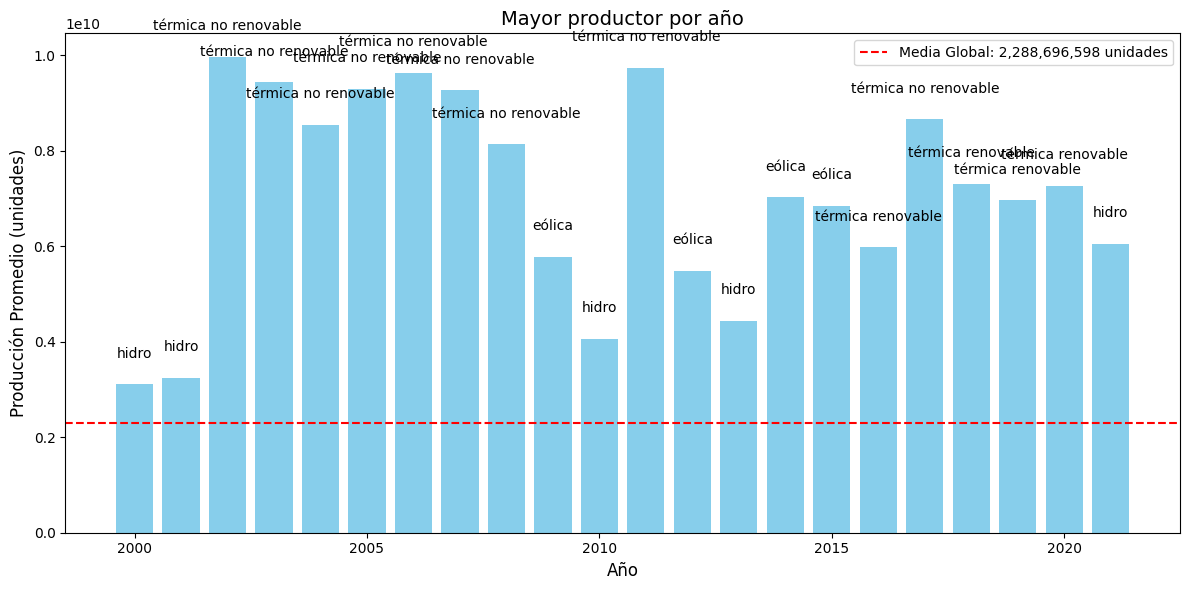

In [42]:
# 1. Agrupar por 'Año' y 'Nombre Fuente' y calcular el promedio de 'Produccion'
promedio_produccion = dataFrameLD.groupby(['Año', 'Nombre Fuente'])['Produccion'].mean().reset_index()

# 2. Filtrar para eliminar registros donde 'Nombre Fuente' sea "otros"
promedio_produccion = promedio_produccion[promedio_produccion['Nombre Fuente'] != 'otros']

# 3. Calcular la media global de producción (opcional, para marcarla en el gráfico)
media_produccion = promedio_produccion['Produccion'].mean()

# Para cada año se toma el índice donde 'Produccion' es máxima
max_por_ano = promedio_produccion.loc[promedio_produccion.groupby('Año')['Produccion'].idxmax()]

plt.figure(figsize=(12, 6))

# Graficar las barras: cada barra representa el mayor productor de ese año
plt.bar(max_por_ano['Año'], max_por_ano['Produccion'], color='skyblue')

# Agregar etiquetas sobre cada barra indicando el 'Nombre Fuente'
for index, row in max_por_ano.iterrows():
    plt.text(row['Año'], row['Produccion'] + 0.05 * max_por_ano['Produccion'].max(),
             row['Nombre Fuente'], ha='center', va='bottom', fontsize=10)

# Agregar una línea horizontal que muestra la media global de producción (opcional)
plt.axhline(y=media_produccion, color='red', linestyle='--',
            label=f'Media Global: {media_produccion:,.0f} unidades')

# Personalizar la gráfica
plt.title('Mayor productor por año', fontsize=14)
plt.xlabel('Año', fontsize=12)
plt.ylabel('Producción Promedio (unidades)', fontsize=12)
plt.legend()

plt.tight_layout()
plt.show()

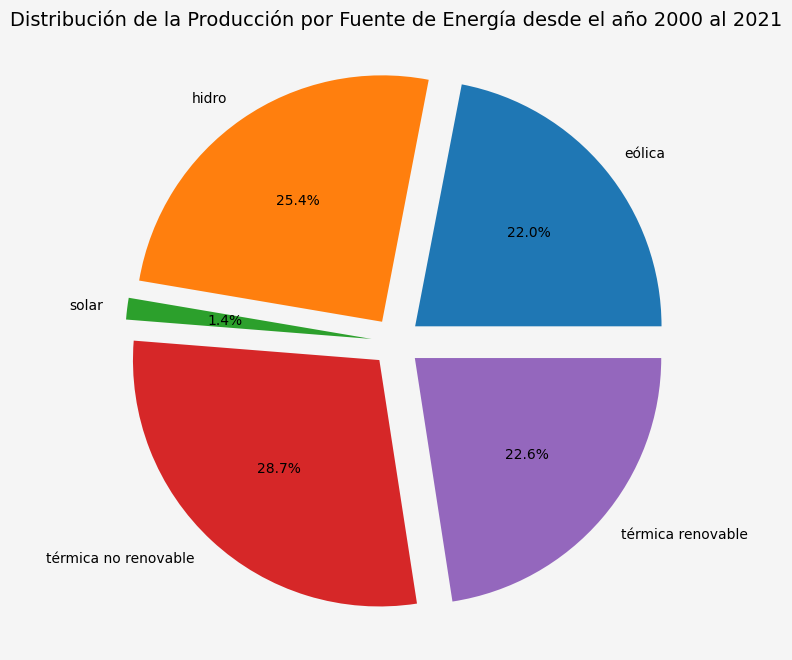

In [41]:
produccion_por_fuente = promedio_produccion.groupby('Nombre Fuente')['Produccion'].apply(
    lambda x: x.str.replace('K', '').str.replace(',', '').astype(float).sum() if x.dtype == 'O' else x.sum()
).reset_index()

# Filtrar y asignar al DataFrame solo las filas donde 'Produccion' es mayor a 0.0
produccion_por_fuente = produccion_por_fuente[produccion_por_fuente['Produccion'] > 0.0]


# Paso 2: Crear la torta
##plt.figure(figsize=(8, 8))
##plt.pie(produccion_por_fuente['Produccion'], labels=produccion_por_fuente['Nombre Fuente'], autopct='%1.1f%%', startangle=90, colors=plt.cm.Paired.colors)
plt.figure(figsize=(8, 8) , facecolor='whitesmoke')
plt.pie(produccion_por_fuente['Produccion'], labels=produccion_por_fuente['Nombre Fuente'],explode=(0.1,0.1,0.1,0.1,0.1),autopct='%1.1f%%')
plt.grid(True)

# Paso 3: Personalizar el gráfico
plt.title('Distribución de la Producción por Fuente de Energía desde el año 2000 al 2021', fontsize=14)


# Mostrar el gráfico
plt.show()

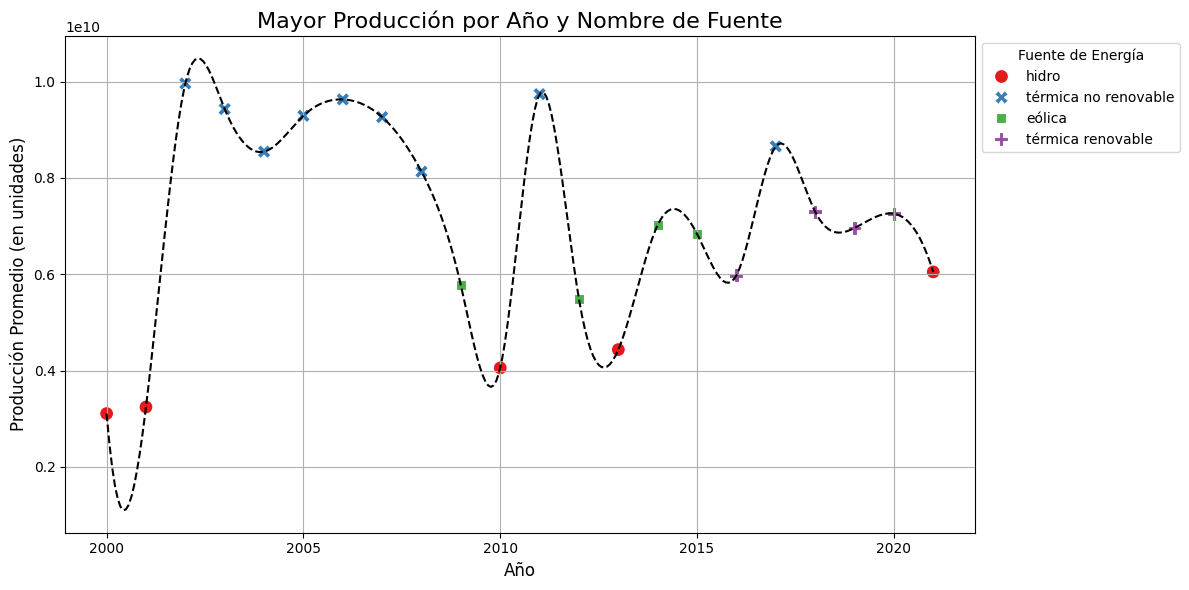

In [59]:

# Paso 1: Agrupar los datos por 'Año' y 'Nombre Fuente' y calcular el promedio de producción
promedio_produccion = dataFrameLD.groupby(['Año', 'Nombre Fuente'])['Produccion'].mean().reset_index()

# Paso 2: Encontrar la fuente con la mayor producción por cada año
max_produccion = promedio_produccion.loc[promedio_produccion.groupby('Año')['Produccion'].idxmax()]

# Paso 3: Crear la gráfica de dispersión usando Seaborn
plt.figure(figsize=(12, 6))  # Ajustar el tamaño de la figura

sns.scatterplot(data=max_produccion,
                x='Año',
                y='Produccion',
                hue='Nombre Fuente',  # Colorear los puntos según la fuente
                style='Nombre Fuente',  # Diferenciar los puntos por el estilo
                s=100,  # Tamaño de los puntos
                palette='Set1'
                )  # Elegir la paleta de colores para los puntos

# Extraer los valores de 'Año' y 'Produccion'
x = max_produccion['Año'].values
y = max_produccion['Produccion'].values

# Paso 4: Interpolar para suavizar la línea
x_new = np.linspace(x.min(), x.max(), 300)
spl = make_interp_spline(x, y, k=3)
y_smooth = spl(x_new)

# Trazar la línea suavizada
plt.plot(x_new, y_smooth, color='black', linestyle='--', linewidth=1.5)

# Paso 4: Personalizar el gráfico
plt.grid(True)
plt.title('Mayor Producción por Año y Nombre de Fuente', fontsize=16)
plt.xlabel('Año', fontsize=12)
plt.ylabel('Producción Promedio (en unidades)', fontsize=12)
plt.legend(title="Fuente de Energía", loc='upper left', bbox_to_anchor=(1, 1))  # Leyenda

# Ajustar el layout para evitar que los elementos se sobrepongan
plt.tight_layout()

# Mostrar el gráfico
plt.show()


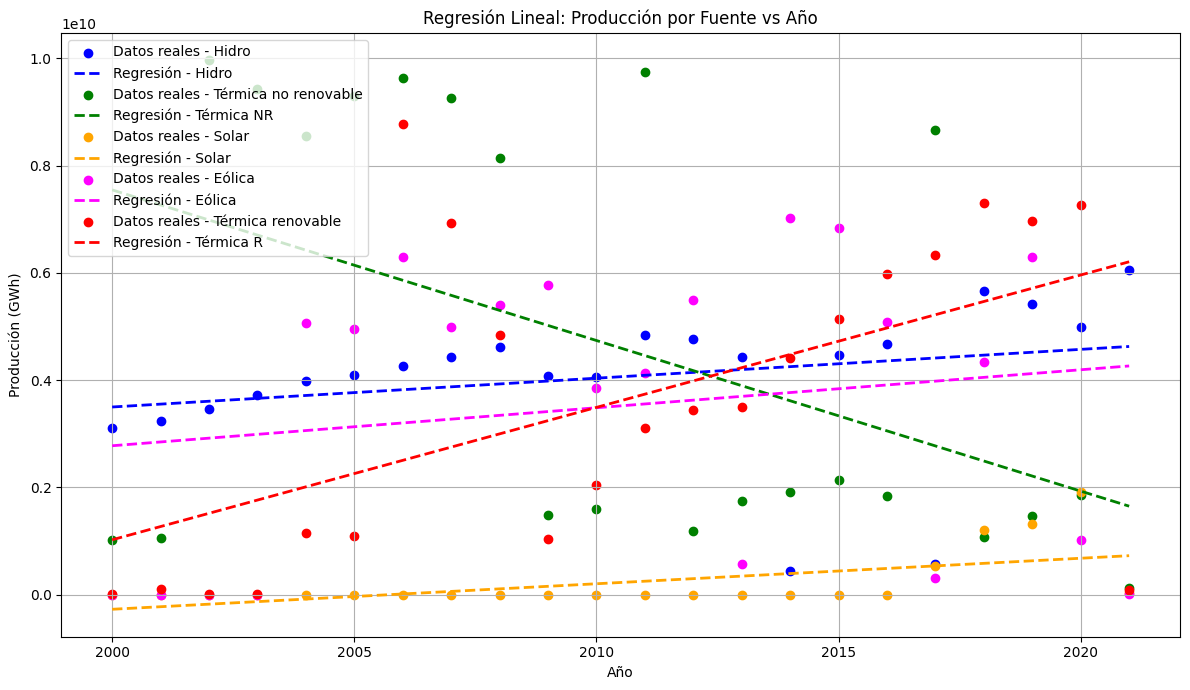

Modelo para Hidro:
  Pendiente: 53,727,229.65 GWh/año
  Intercepto: -103,956,147,914.52 GWh

Modelo para Térmica No Renovable:
  Pendiente: -280,795,331.72 GWh/año
  Intercepto: 569,136,612,030.37 GWh

Modelo para Solar:
  Pendiente: 47,567,264.65 GWh/año
  Intercepto: -95,407,109,888.16 GWh

Modelo para Eólica:
  Pendiente: 70,833,515.96 GWh/año
  Intercepto: -138,891,105,008.44 GWh

Modelo para Térmica Renovable:
  Pendiente: 246,809,473.84 GWh/año
  Intercepto: -492,596,170,392.68 GWh



In [102]:
# 1. Agrupar por Año y Fuente y calcular la producción promedio
promedio_produccion = dataFrameLD.groupby(['Año', 'Nombre Fuente'])['Produccion'].mean().reset_index()

# 2. Filtrar los datos para cada fuente y ordenar por Año (incluyendo térmica renovable)
promo_hidro = promedio_produccion[promedio_produccion['Nombre Fuente'] == 'hidro'].sort_values('Año')
promo_termica_nr = promedio_produccion[promedio_produccion['Nombre Fuente'] == 'térmica no renovable'].sort_values('Año')
promo_solar = promedio_produccion[promedio_produccion['Nombre Fuente'] == 'solar'].sort_values('Año')
promo_eolica = promedio_produccion[promedio_produccion['Nombre Fuente'] == 'eólica'].sort_values('Año')
promo_termica_r = promedio_produccion[promedio_produccion['Nombre Fuente'] == 'térmica renovable'].sort_values('Año')

# 3. Ajustar la regresión lineal para cada fuente (añadiendo térmica renovable)

# Regresión para Térmica renovable
X_tr = promo_termica_r[['Año']].values  # Variable independiente
y_tr = promo_termica_r['Produccion'].values  # Variable dependiente
modelo_tr = LinearRegression()
modelo_tr.fit(X_tr, y_tr)
y_pred_tr = modelo_tr.predict(X_tr)

# 4. Graficar los puntos reales y las líneas de regresión para cada fuente en una sola figura
plt.figure(figsize=(12, 7))

# Fuente Hidro
plt.scatter(X_h, y_h, color='blue', label='Datos reales - Hidro')
plt.plot(X_h, y_pred_h, color='blue', linestyle='--', linewidth=2, label='Regresión - Hidro')

# Fuente Térmica no renovable
plt.scatter(X_t, y_t, color='green', label='Datos reales - Térmica no renovable')
plt.plot(X_t, y_pred_t, color='green', linestyle='--', linewidth=2, label='Regresión - Térmica NR')

# Fuente Solar
plt.scatter(X_s, y_s, color='orange', label='Datos reales - Solar')
plt.plot(X_s, y_pred_s, color='orange', linestyle='--', linewidth=2, label='Regresión - Solar')

# Fuente Eólica
plt.scatter(X_e, y_e, color='magenta', label='Datos reales - Eólica')
plt.plot(X_e, y_pred_e, color='magenta', linestyle='--', linewidth=2, label='Regresión - Eólica')

# Fuente Térmica renovable
plt.scatter(X_tr, y_tr, color='red', label='Datos reales - Térmica renovable')
plt.plot(X_tr, y_pred_tr, color='red', linestyle='--', linewidth=2, label='Regresión - Térmica R')

plt.xlabel('Año')
plt.ylabel('Producción (GWh)')
plt.title('Regresión Lineal: Producción por Fuente vs Año')
plt.legend(loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()

# 5. Mostrar coeficientes de cada modelo (incluyendo térmica renovable)
# 5. Mostrar coeficientes de cada modelo
print("Modelo para Hidro:")
print(f"  Pendiente: {modelo_h.coef_[0]:,.2f} GWh/año")
print(f"  Intercepto: {modelo_h.intercept_:,.2f} GWh\n")

print("Modelo para Térmica No Renovable:")
print(f"  Pendiente: {modelo_t.coef_[0]:,.2f} GWh/año")
print(f"  Intercepto: {modelo_t.intercept_:,.2f} GWh\n")

print("Modelo para Solar:")
print(f"  Pendiente: {modelo_s.coef_[0]:,.2f} GWh/año")
print(f"  Intercepto: {modelo_s.intercept_:,.2f} GWh\n")

print("Modelo para Eólica:")
print(f"  Pendiente: {modelo_e.coef_[0]:,.2f} GWh/año")
print(f"  Intercepto: {modelo_e.intercept_:,.2f} GWh\n")

print("Modelo para Térmica Renovable:")
print(f"  Pendiente: {modelo_tr.coef_[0]:,.2f} GWh/año")
print(f"  Intercepto: {modelo_tr.intercept_:,.2f} GWh\n")
